In [1]:
import torch

import torch.nn.functional as F

In [73]:
model =

In [74]:
example = torch.rand(latent_dim, categorical_dim)
example

tensor([[0.6308, 0.0252],
        [0.1601, 0.2879],
        [0.4882, 0.2824],
        [0.3180, 0.9577],
        [0.9665, 0.2394]])

In [76]:
torch.set_printoptions(threshold=5)
y = gumbel_softmax(example, 1, hard=False)
y

tensor([[0.7737, 0.2263],
        [0.5796, 0.4204],
        [0.2071, 0.7929],
        [0.8440, 0.1560],
        [0.5917, 0.4083]])

In [79]:
F.gumbel_softmax(example, tau=1, hard=False, eps=1e-5, dim=-1)

/home/ichida/miniconda3/envs/dl/lib/python3.9/site-packages/torch/nn/functional.py:1883: UserWarning: `eps` parameter is deprecated and has no effect.
  warnings.warn("`eps` parameter is deprecated and has no effect.")


tensor([[0.6492, 0.3508],
        [0.8914, 0.1086],
        [0.1810, 0.8190],
        [0.0288, 0.9712],
        [0.9931, 0.0069]])

In [82]:
shape = y.size()
_, ind = y.max(dim=-1)
y_hard = torch.zeros_like(y).view(-1, shape[-1])
y_hard.scatter_(1, ind.view(-1, 1), 1)
#print(y_hard.size())
#print(y_hard)
#y_hard = (y_hard - y).detach() + y

tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.]])

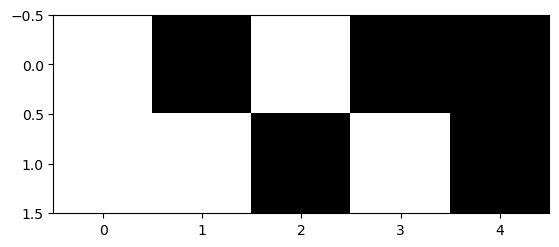

In [84]:
latent_vector = y_hard.cpu().numpy()
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(y_hard.view(2,5).cpu().numpy(), cmap='gray')
plt.show()